In [1]:
class Nodo:
    def __init__(self, nombre):
        self.nombre = nombre
        self.relaciones = {}
    
    def agregar_relacion(self, relacion, nodo):
        if relacion not in self.relaciones:
            self.relaciones[relacion] = []
        self.relaciones[relacion].append(nodo)
    
    def __str__(self):
        return f"{self.nombre}: {self.relaciones}"

In [3]:
class RedSemantica:
    def __init__(self):
        self.nodos = {}
    
    def agregar_nodo(self, nombre):
        if nombre not in self.nodos:
            self.nodos[nombre] = Nodo(nombre)
    
    def agregar_relacion(self, nodo1, relacion, nodo2):
        if nodo1 in self.nodos and nodo2 in self.nodos:
            self.nodos[nodo1].agregar_relacion(relacion, nodo2)
    
    def consultar_relaciones(self, nodo):
        if nodo in self.nodos:
            return self.nodos[nodo].relaciones
        return {}
    
    def buscar_por_relacion(self, relacion, nodo_objetivo):
        resultados = []
        for nombre_nodo, nodo in self.nodos.items():
            if relacion in nodo.relaciones and nodo_objetivo in nodo.relaciones[relacion]:
                resultados.append(nombre_nodo)
        return resultados
    
    def __str__(self):
        return "\n".join(str(nodo) for nodo in self.nodos.values())

In [4]:
# Create network
red = RedSemantica()

# Add nodes
red.agregar_nodo("Perro")
red.agregar_nodo("Animal")
red.agregar_nodo("Mamífero")
red.agregar_nodo("Ladra")
red.agregar_nodo("Tiene_pelo")

In [5]:
# Establish relationships
red.agregar_relacion("Perro", "es-un", "Animal")
red.agregar_relacion("Perro", "es-un", "Mamífero")
red.agregar_relacion("Perro", "puede", "Ladra")
red.agregar_relacion("Perro", "tiene", "Tiene_pelo")
red.agregar_relacion("Mamífero", "es-un", "Animal")

In [6]:
# Query the network
print("Red Semántica completa:")
print(red)

print("\nRelaciones del nodo 'Perro':")
print(red.consultar_relaciones("Perro"))

print("\nNodos que tienen relación 'es-un' con 'Animal':")
print(red.buscar_por_relacion("es-un", "Animal"))

Red Semántica completa:
Perro: {'es-un': ['Animal', 'Mamífero'], 'puede': ['Ladra'], 'tiene': ['Tiene_pelo']}
Animal: {}
Mamífero: {'es-un': ['Animal']}
Ladra: {}
Tiene_pelo: {}

Relaciones del nodo 'Perro':
{'es-un': ['Animal', 'Mamífero'], 'puede': ['Ladra'], 'tiene': ['Tiene_pelo']}

Nodos que tienen relación 'es-un' con 'Animal':
['Perro', 'Mamífero']


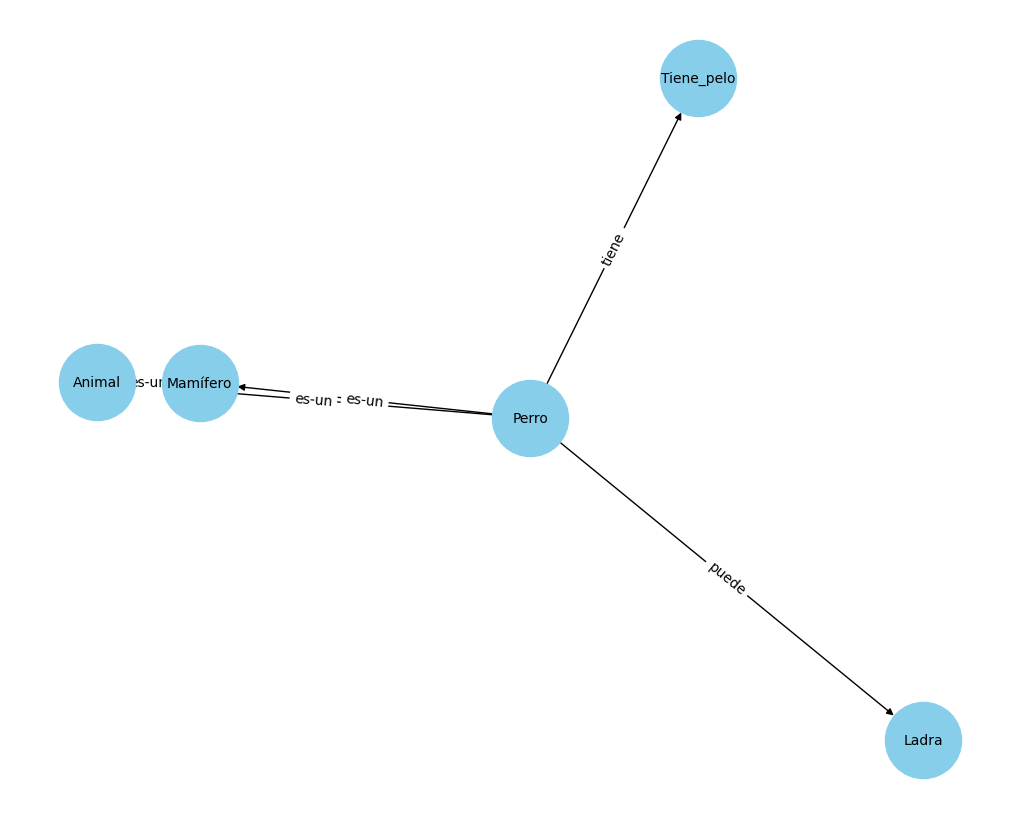

In [7]:
# Optional: Simple visualization using networkx
import networkx as nx
import matplotlib.pyplot as plt

def visualizar_red(red):
    G = nx.DiGraph()
    
    for nombre, nodo in red.nodos.items():
        for relacion, destinos in nodo.relaciones.items():
            for destino in destinos:
                G.add_edge(nombre, destino, label=relacion)
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

visualizar_red(red)